## Importing Libraries

In [84]:
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.models import model_from_json
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, LeakyReLU


 ## Read and preprocess the data

In [53]:
data=pd.read_csv(r"C:\Users\zafreen\Desktop\Great Learning\NN\Part- 1 - Signal.csv",sep=",") 
print(data.head()) 
print(data.corr())
print(data.describe().T)
print(data.isna().sum())
print(data.shape)

   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           

## Split data into independent variables and target variable and check for importance of independent variables

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


C:\Users\zafreen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


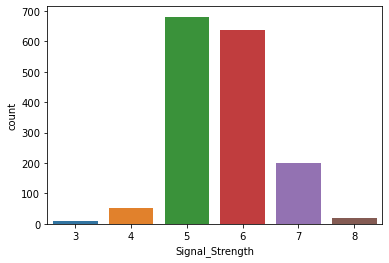

In [85]:
sns.countplot(data['Signal_Strength'])
plt.show()

C:\Users\zafreen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

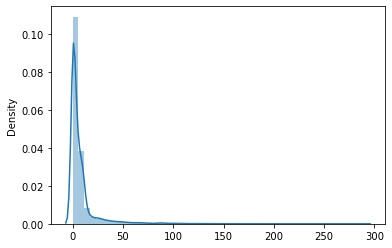

In [86]:
sns.distplot(data)

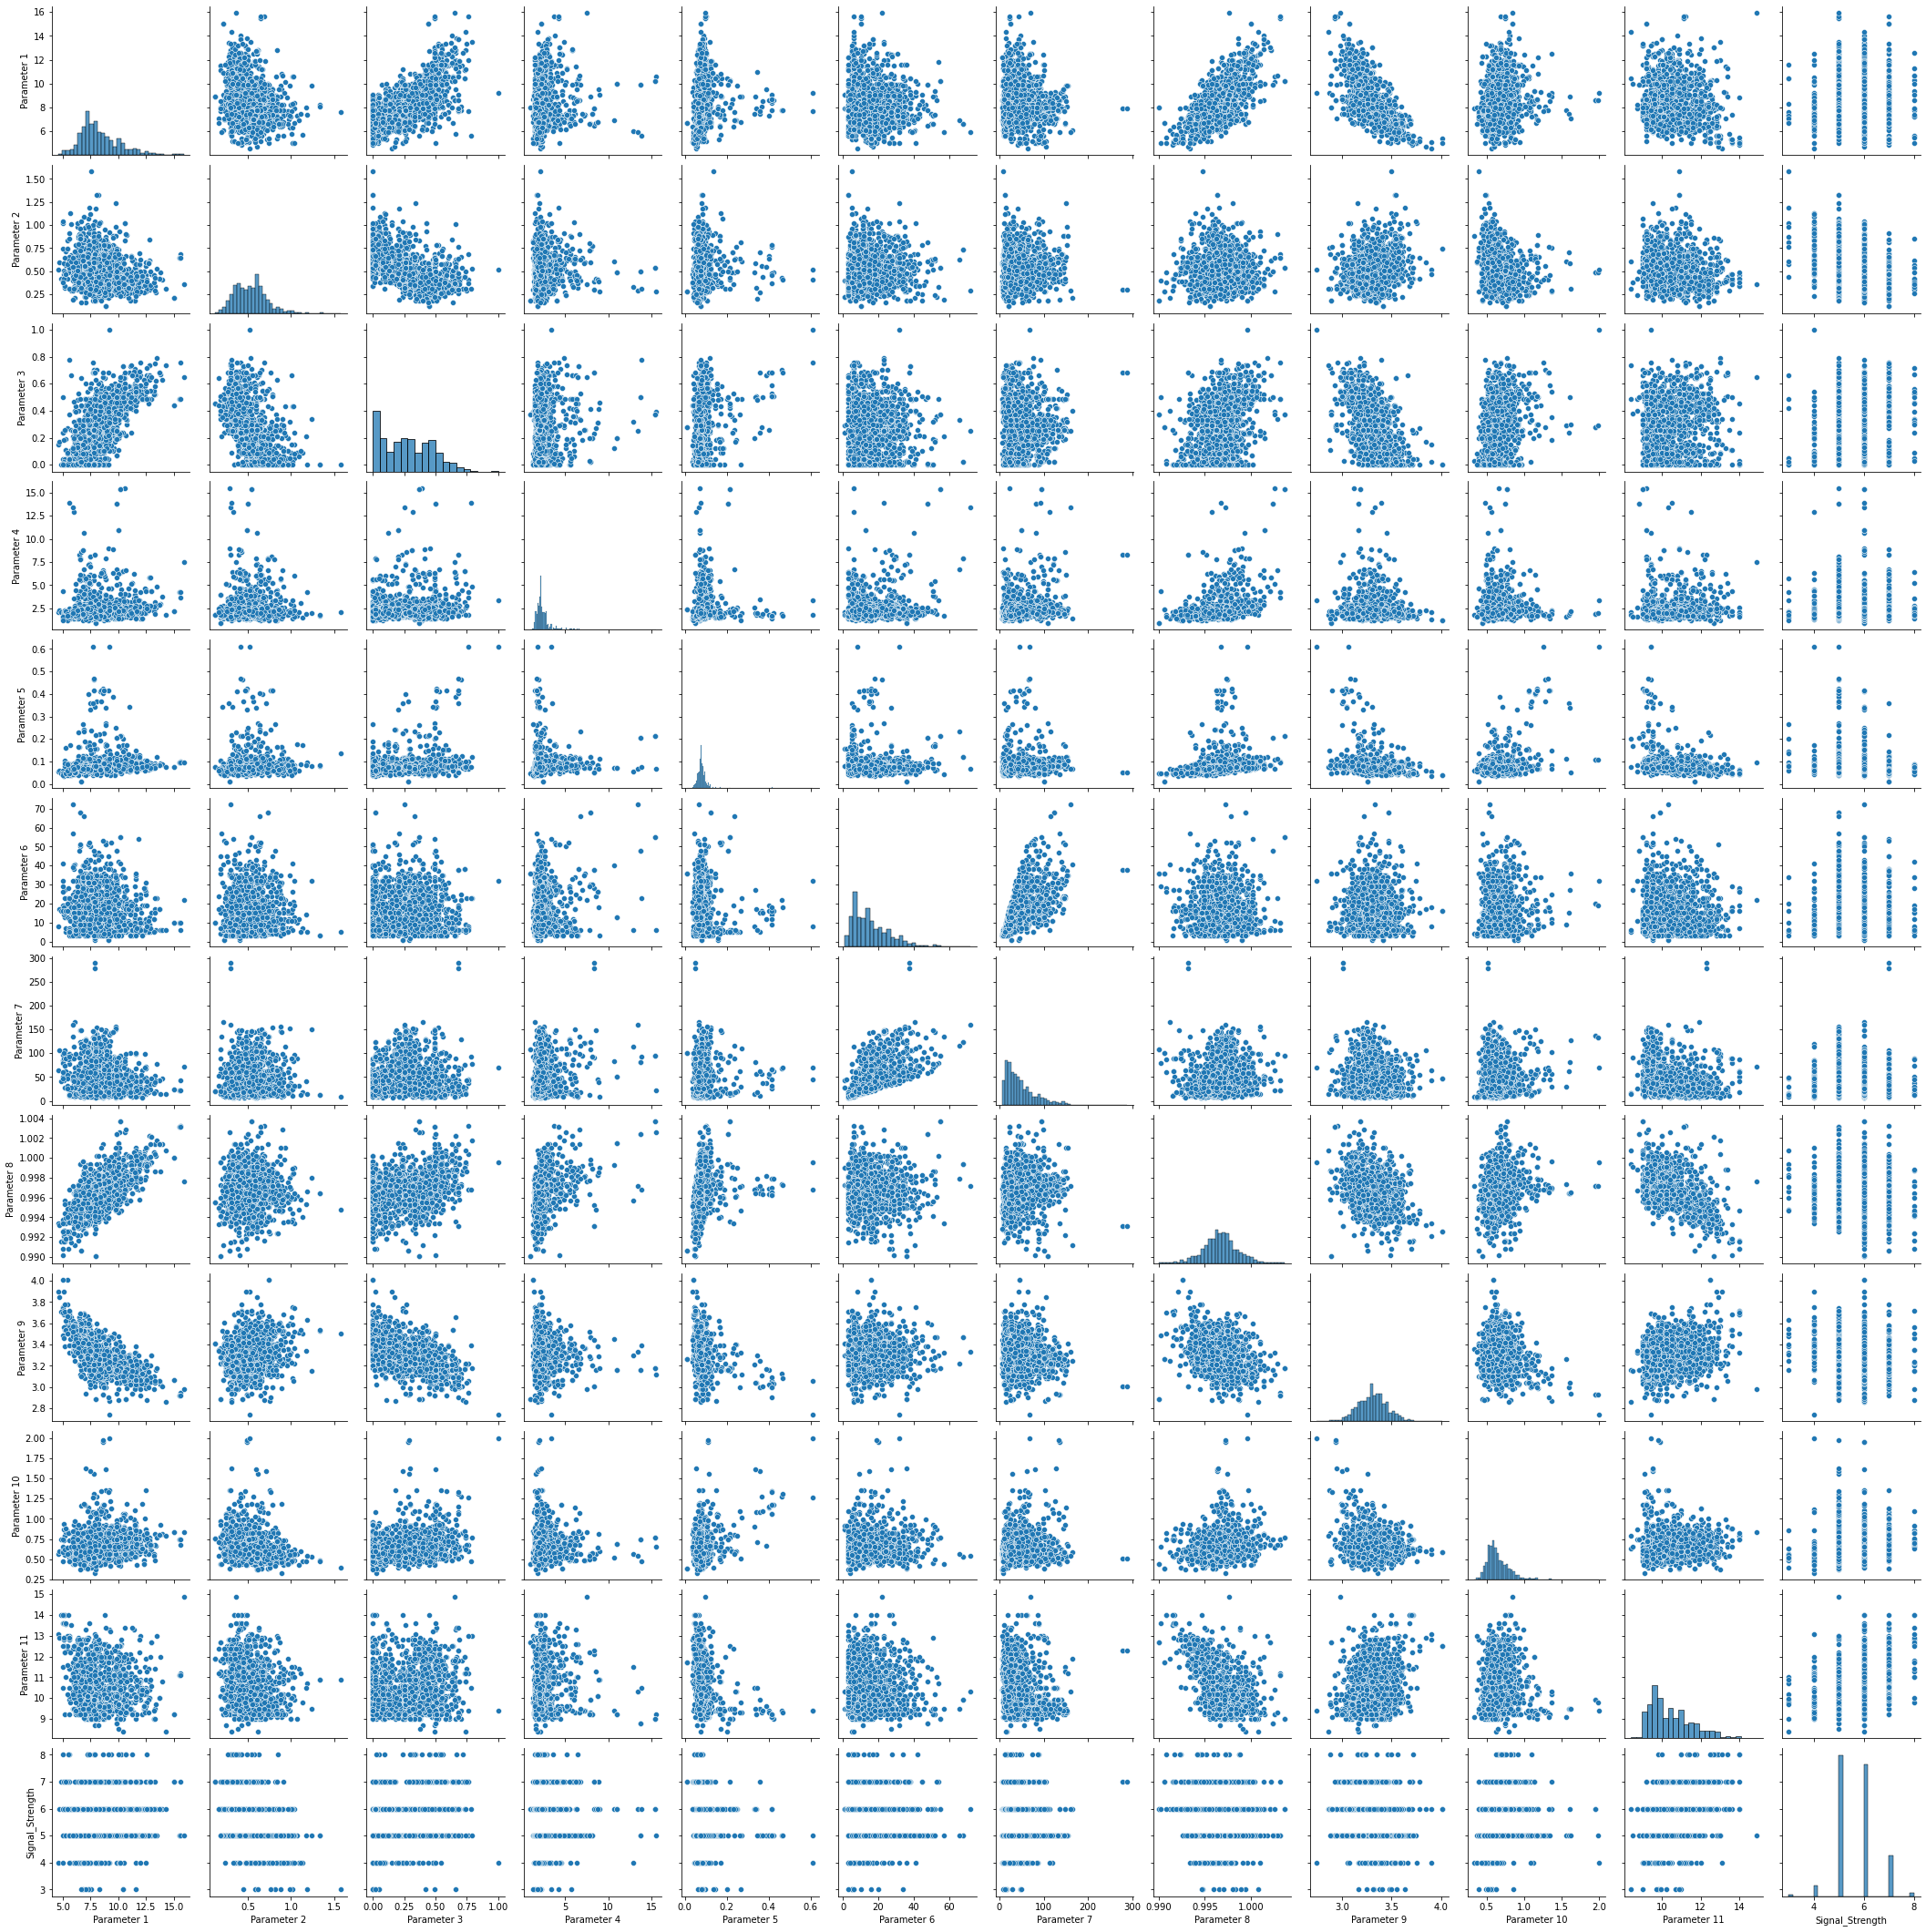

In [87]:
sns.pairplot(data)

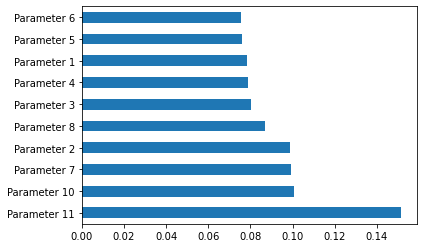

In [54]:
X=data.drop('Signal_Strength',axis=1)       
Y=data['Signal_Strength']                   
model = ExtraTreesClassifier()
model.fit(X,Y)
fimportances = pd.Series(model.feature_importances_, index=X.columns)
fimportances.nlargest(10).plot(kind='barh')
plt.show()

## Split the Data into train and test set and scale independent variables and categorize target variable

In [79]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X, Y, test_size=0.3, random_state=1)
print(Xtrain.shape)
print(Xtest.shape)
trainx_scaled= StandardScaler().fit_transform(Xtrain)   
testx_scaled = StandardScaler().fit_transform(Xtest) 
print(trainx_scaled.shape)
print(testx_scaled.shape)
# Ytrain = to_categorical(Ytrain)
# Ytest = to_categorical(Ytest)

(1119, 11)
(480, 11)
(1119, 11)
(480, 11)


## define a Neural Network Classifier function  and pass the activation function,optimizer and the number of epochs

In [96]:
epochs=500

def Neural_Network_Classifier(activation_function):
    Model1 = Sequential()
    Model1.add(Dense(128, kernel_initializer='normal',input_dim = Xtrain.shape[1], activation=activation_function))
    Model1.add(Dense(64, kernel_initializer='normal',activation=activation_function))  
    Model1.add(Dense(32, kernel_initializer='normal'))
    Model1.add(LeakyReLU(alpha=0.1))
    Model1.add(Dense(16, kernel_initializer='normal'))
    Model1.add(LeakyReLU(alpha=0.1))
    Model1.add(Dense(9, kernel_initializer='normal',activation='softmax'))     
    return Model1

def Neural_Network_Regressor(activation_function):
    Model= Sequential()
    Model.add(Dense(128, kernel_initializer='normal',input_dim = Xtrain.shape[1], activation=activation_function))
    Model.add(Dense(64, kernel_initializer='normal',activation=activation_function))  
    Model.add(Dense(32, kernel_initializer='normal'))
    Model.add(LeakyReLU(alpha=0.1))
    Model.add(Dense(16, kernel_initializer='normal'))
    Model.add(LeakyReLU(alpha=0.1))
    Model.add(Dense(1, kernel_initializer='normal'))  
    Model.add(LeakyReLU(alpha=0.1))
    return Model


def loss_calculation(Model_result):
    traing_loss = Model_result.history['loss']
    test_loss= Model_result.history['val_loss']
    x_axis = range(1,500+1)
    plt.plot(x_axis, traing_loss, 'g', label='Training loss')
    plt.plot(x_axis, test_loss, 'b', label='Testing loss')
    plt.title('Training v/s Testing loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    Acc_train = Model_result.history['accuracy']
    Acc_val = Model_result.history['val_accuracy']
    epochs = range(1,500+1)
    plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    

## Call the function with activation function = tahn,sigmoid,relu Optimizer=adam and check for train v/s test loss and accuracy

Epoch 1/500
7/7 [==============================] - 2s 69ms/step - loss: 0.1974 - accuracy: 0.4191 - val_loss: 0.1972 - val_accuracy: 0.5656
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 0.1971 - accuracy: 0.5223 - val_loss: 0.1969 - val_accuracy: 0.6062
Epoch 3/500
7/7 [==============================] - 0s 12ms/step - loss: 0.1966 - accuracy: 0.5410 - val_loss: 0.1962 - val_accuracy: 0.6125
Epoch 4/500
7/7 [==============================] - 0s 12ms/step - loss: 0.1958 - accuracy: 0.5410 - val_loss: 0.1949 - val_accuracy: 0.6125
Epoch 5/500
7/7 [==============================] - 0s 15ms/step - loss: 0.1937 - accuracy: 0.5231 - val_loss: 0.1912 - val_accuracy: 0.5938
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 0.1880 - accuracy: 0.5160 - val_loss: 0.1811 - val_accuracy: 0.5844
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 0.1737 - accuracy: 0.5066 - val_loss: 0.1599 - val_accuracy: 0.5531
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 13ms/step - loss: 0.0907 - accuracy: 0.5919 - val_loss: 0.0847 - val_accuracy: 0.6156
Epoch 118/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0906 - accuracy: 0.5919 - val_loss: 0.0842 - val_accuracy: 0.6219
Epoch 119/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0906 - accuracy: 0.5934 - val_loss: 0.0837 - val_accuracy: 0.6250
Epoch 120/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0908 - accuracy: 0.5919 - val_loss: 0.0846 - val_accuracy: 0.6187
Epoch 121/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0908 - accuracy: 0.5919 - val_loss: 0.0842 - val_accuracy: 0.6219
Epoch 122/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0903 - accuracy: 0.5942 - val_loss: 0.0839 - val_accuracy: 0.6219
Epoch 123/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0912 - accuracy: 0.5895 - val_loss: 0.0829 - val_accuracy: 0.6281
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0913 - accuracy: 0.5903 - val_loss: 0.0852 - val_accuracy: 0.6156
Epoch 176/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0911 - accuracy: 0.5903 - val_loss: 0.0853 - val_accuracy: 0.6156
Epoch 177/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0911 - accuracy: 0.5903 - val_loss: 0.0854 - val_accuracy: 0.6156
Epoch 178/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0911 - accuracy: 0.5903 - val_loss: 0.0854 - val_accuracy: 0.6156
Epoch 179/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0911 - accuracy: 0.5903 - val_loss: 0.0854 - val_accuracy: 0.6156
Epoch 180/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0911 - accuracy: 0.5903 - val_loss: 0.0855 - val_accuracy: 0.6156
Epoch 181/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0911 - accuracy: 0.5903 - val_loss: 0.0855 - val_accuracy: 0.6156
Epoch 

Epoch 233/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0895 - accuracy: 0.5973 - val_loss: 0.0832 - val_accuracy: 0.6250
Epoch 234/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0896 - accuracy: 0.5966 - val_loss: 0.0830 - val_accuracy: 0.6281
Epoch 235/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0892 - accuracy: 0.5989 - val_loss: 0.0827 - val_accuracy: 0.6281
Epoch 236/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0899 - accuracy: 0.5950 - val_loss: 0.0837 - val_accuracy: 0.6250
Epoch 237/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0900 - accuracy: 0.5950 - val_loss: 0.0840 - val_accuracy: 0.6219
Epoch 238/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0905 - accuracy: 0.5934 - val_loss: 0.0853 - val_accuracy: 0.6187
Epoch 239/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0905 - accuracy: 0.5934 - val_loss: 0.0846 - val_accuracy: 0.6187
Epoch 

Epoch 291/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0904 - accuracy: 0.5934 - val_loss: 0.0852 - val_accuracy: 0.6156
Epoch 292/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0901 - accuracy: 0.5942 - val_loss: 0.0847 - val_accuracy: 0.6187
Epoch 293/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0899 - accuracy: 0.5958 - val_loss: 0.0854 - val_accuracy: 0.6156
Epoch 294/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0897 - accuracy: 0.5973 - val_loss: 0.0844 - val_accuracy: 0.6219
Epoch 295/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0895 - accuracy: 0.5973 - val_loss: 0.0854 - val_accuracy: 0.6156
Epoch 296/500
7/7 [==============================] - 0s 17ms/step - loss: 0.0896 - accuracy: 0.5966 - val_loss: 0.0854 - val_accuracy: 0.6156
Epoch 297/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0892 - accuracy: 0.5981 - val_loss: 0.0865 - val_accuracy: 0.6094
Epoch 

Epoch 349/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0883 - accuracy: 0.6028 - val_loss: 0.0831 - val_accuracy: 0.6250
Epoch 350/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0883 - accuracy: 0.6028 - val_loss: 0.0831 - val_accuracy: 0.6250
Epoch 351/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0883 - accuracy: 0.6028 - val_loss: 0.0831 - val_accuracy: 0.6250
Epoch 352/500
7/7 [==============================] - 0s 17ms/step - loss: 0.0882 - accuracy: 0.6028 - val_loss: 0.0830 - val_accuracy: 0.6281
Epoch 353/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0882 - accuracy: 0.6028 - val_loss: 0.0830 - val_accuracy: 0.6281
Epoch 354/500
7/7 [==============================] - 0s 23ms/step - loss: 0.0882 - accuracy: 0.6028 - val_loss: 0.0830 - val_accuracy: 0.6281
Epoch 355/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0882 - accuracy: 0.6028 - val_loss: 0.0831 - val_accuracy: 0.6250
Epoch 

Epoch 407/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0902 - accuracy: 0.5942 - val_loss: 0.0813 - val_accuracy: 0.6344
Epoch 408/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0900 - accuracy: 0.5950 - val_loss: 0.0807 - val_accuracy: 0.6375
Epoch 409/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0895 - accuracy: 0.5981 - val_loss: 0.0810 - val_accuracy: 0.6344
Epoch 410/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0897 - accuracy: 0.5966 - val_loss: 0.0807 - val_accuracy: 0.6375
Epoch 411/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0890 - accuracy: 0.5997 - val_loss: 0.0830 - val_accuracy: 0.6281
Epoch 412/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0894 - accuracy: 0.5981 - val_loss: 0.0815 - val_accuracy: 0.6344
Epoch 413/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0893 - accuracy: 0.5981 - val_loss: 0.0799 - val_accuracy: 0.6375
Epoch 

Epoch 465/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 466/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 467/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 468/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 469/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 470/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 471/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0884 - accuracy: 0.6020 - val_loss: 0.0809 - val_accuracy: 0.6375
Epoch 

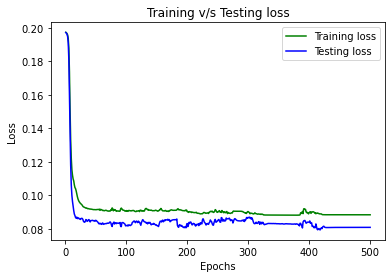

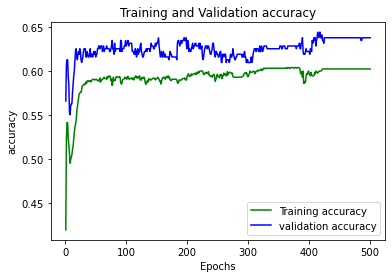

In [22]:
Model1=Neural_Network_Classifier("tanh",500)
Model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
Model_result=Model1.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=500, batch_size=200)
loss_calculation(Model_result,500)

Epoch 1/500
7/7 [==============================] - 2s 66ms/step - loss: 0.1972 - accuracy: 0.2776 - val_loss: 0.1966 - val_accuracy: 0.4375
Epoch 2/500
7/7 [==============================] - 0s 13ms/step - loss: 0.1960 - accuracy: 0.4230 - val_loss: 0.1945 - val_accuracy: 0.4375
Epoch 3/500
7/7 [==============================] - 0s 15ms/step - loss: 0.1930 - accuracy: 0.4230 - val_loss: 0.1897 - val_accuracy: 0.4375
Epoch 4/500
7/7 [==============================] - 0s 12ms/step - loss: 0.1863 - accuracy: 0.4230 - val_loss: 0.1786 - val_accuracy: 0.4375
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 0.1721 - accuracy: 0.4230 - val_loss: 0.1576 - val_accuracy: 0.4375
Epoch 6/500
7/7 [==============================] - 0s 16ms/step - loss: 0.1509 - accuracy: 0.4230 - val_loss: 0.1366 - val_accuracy: 0.4375
Epoch 7/500
7/7 [==============================] - 0s 14ms/step - loss: 0.1363 - accuracy: 0.4230 - val_loss: 0.1288 - val_accuracy: 0.4375
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 16ms/step - loss: 0.0926 - accuracy: 0.5880 - val_loss: 0.0874 - val_accuracy: 0.5969
Epoch 118/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0925 - accuracy: 0.5880 - val_loss: 0.0881 - val_accuracy: 0.5969
Epoch 119/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0924 - accuracy: 0.5848 - val_loss: 0.0874 - val_accuracy: 0.6000
Epoch 120/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0921 - accuracy: 0.5872 - val_loss: 0.0882 - val_accuracy: 0.6062
Epoch 121/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0921 - accuracy: 0.5856 - val_loss: 0.0872 - val_accuracy: 0.6000
Epoch 122/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0922 - accuracy: 0.5872 - val_loss: 0.0877 - val_accuracy: 0.6062
Epoch 123/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0921 - accuracy: 0.5864 - val_loss: 0.0862 - val_accuracy: 0.6156
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0902 - accuracy: 0.5958 - val_loss: 0.0866 - val_accuracy: 0.6094
Epoch 176/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0903 - accuracy: 0.5958 - val_loss: 0.0866 - val_accuracy: 0.6094
Epoch 177/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0903 - accuracy: 0.5958 - val_loss: 0.0866 - val_accuracy: 0.6094
Epoch 178/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0901 - accuracy: 0.5973 - val_loss: 0.0866 - val_accuracy: 0.6094
Epoch 179/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0904 - accuracy: 0.5934 - val_loss: 0.0867 - val_accuracy: 0.6062
Epoch 180/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0901 - accuracy: 0.5989 - val_loss: 0.0868 - val_accuracy: 0.6094
Epoch 181/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0901 - accuracy: 0.5958 - val_loss: 0.0867 - val_accuracy: 0.6094
Epoch 

Epoch 233/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0897 - accuracy: 0.5981 - val_loss: 0.0871 - val_accuracy: 0.6062
Epoch 234/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0895 - accuracy: 0.5997 - val_loss: 0.0877 - val_accuracy: 0.6000
Epoch 235/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0896 - accuracy: 0.5997 - val_loss: 0.0874 - val_accuracy: 0.6031
Epoch 236/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0895 - accuracy: 0.5989 - val_loss: 0.0871 - val_accuracy: 0.6062
Epoch 237/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0895 - accuracy: 0.5989 - val_loss: 0.0874 - val_accuracy: 0.6031
Epoch 238/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0896 - accuracy: 0.5997 - val_loss: 0.0875 - val_accuracy: 0.6031
Epoch 239/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0894 - accuracy: 0.5997 - val_loss: 0.0874 - val_accuracy: 0.6062
Epoch 2

Epoch 291/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0854 - accuracy: 0.6255 - val_loss: 0.0906 - val_accuracy: 0.5938
Epoch 292/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0850 - accuracy: 0.6255 - val_loss: 0.0910 - val_accuracy: 0.5875
Epoch 293/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0846 - accuracy: 0.6294 - val_loss: 0.0909 - val_accuracy: 0.5813
Epoch 294/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0843 - accuracy: 0.6302 - val_loss: 0.0904 - val_accuracy: 0.5875
Epoch 295/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0842 - accuracy: 0.6255 - val_loss: 0.0902 - val_accuracy: 0.5875
Epoch 296/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0839 - accuracy: 0.6278 - val_loss: 0.0907 - val_accuracy: 0.5844
Epoch 297/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0839 - accuracy: 0.6310 - val_loss: 0.0910 - val_accuracy: 0.5813
Epoch 

Epoch 349/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0812 - accuracy: 0.6372 - val_loss: 0.0903 - val_accuracy: 0.5938
Epoch 350/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0811 - accuracy: 0.6380 - val_loss: 0.0899 - val_accuracy: 0.5938
Epoch 351/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0810 - accuracy: 0.6380 - val_loss: 0.0902 - val_accuracy: 0.5969
Epoch 352/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0811 - accuracy: 0.6372 - val_loss: 0.0903 - val_accuracy: 0.5906
Epoch 353/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0813 - accuracy: 0.6372 - val_loss: 0.0898 - val_accuracy: 0.5969
Epoch 354/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0811 - accuracy: 0.6380 - val_loss: 0.0906 - val_accuracy: 0.5938
Epoch 355/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0810 - accuracy: 0.6372 - val_loss: 0.0900 - val_accuracy: 0.5938
Epoch 

Epoch 407/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0807 - accuracy: 0.6388 - val_loss: 0.0892 - val_accuracy: 0.6062
Epoch 408/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0807 - accuracy: 0.6388 - val_loss: 0.0906 - val_accuracy: 0.5906
Epoch 409/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0808 - accuracy: 0.6372 - val_loss: 0.0895 - val_accuracy: 0.5969
Epoch 410/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0806 - accuracy: 0.6380 - val_loss: 0.0896 - val_accuracy: 0.6000
Epoch 411/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0806 - accuracy: 0.6403 - val_loss: 0.0897 - val_accuracy: 0.5969
Epoch 412/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0805 - accuracy: 0.6388 - val_loss: 0.0892 - val_accuracy: 0.5969
Epoch 413/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0805 - accuracy: 0.6388 - val_loss: 0.0896 - val_accuracy: 0.5969
Epoch 

Epoch 465/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0802 - accuracy: 0.6403 - val_loss: 0.0890 - val_accuracy: 0.6031
Epoch 466/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0802 - accuracy: 0.6403 - val_loss: 0.0887 - val_accuracy: 0.6031
Epoch 467/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0801 - accuracy: 0.6411 - val_loss: 0.0886 - val_accuracy: 0.6031
Epoch 468/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0803 - accuracy: 0.6403 - val_loss: 0.0886 - val_accuracy: 0.6031
Epoch 469/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0804 - accuracy: 0.6388 - val_loss: 0.0886 - val_accuracy: 0.6062
Epoch 470/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0802 - accuracy: 0.6403 - val_loss: 0.0893 - val_accuracy: 0.6000
Epoch 471/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0802 - accuracy: 0.6396 - val_loss: 0.0889 - val_accuracy: 0.6000
Epoch 

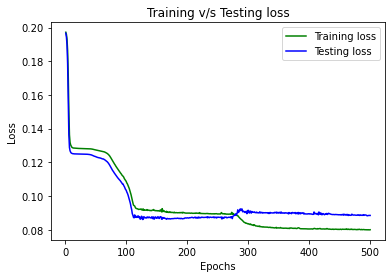

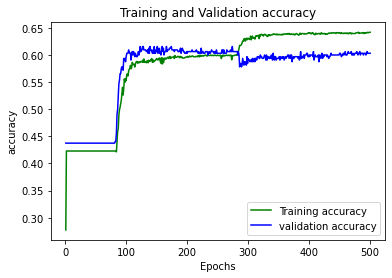

In [29]:
Model2_sigmoid=Neural_Network_Classifier("sigmoid")
Model2_sigmoid.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
Model_result=Model2_sigmoid.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=500, batch_size=200)
loss_calculation(Model_result,500)

Epoch 1/500
7/7 [==============================] - 2s 74ms/step - loss: 0.1974 - accuracy: 0.4058 - val_loss: 0.1972 - val_accuracy: 0.4375
Epoch 2/500
7/7 [==============================] - 0s 13ms/step - loss: 0.1970 - accuracy: 0.4230 - val_loss: 0.1966 - val_accuracy: 0.4375
Epoch 3/500
7/7 [==============================] - 0s 13ms/step - loss: 0.1962 - accuracy: 0.4230 - val_loss: 0.1952 - val_accuracy: 0.4375
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 0.1941 - accuracy: 0.4230 - val_loss: 0.1913 - val_accuracy: 0.4375
Epoch 5/500
7/7 [==============================] - 0s 14ms/step - loss: 0.1878 - accuracy: 0.4230 - val_loss: 0.1790 - val_accuracy: 0.4375
Epoch 6/500
7/7 [==============================] - 0s 14ms/step - loss: 0.1695 - accuracy: 0.4230 - val_loss: 0.1491 - val_accuracy: 0.4375
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 0.1400 - accuracy: 0.4230 - val_loss: 0.1246 - val_accuracy: 0.4375
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 15ms/step - loss: 0.0827 - accuracy: 0.6278 - val_loss: 0.0877 - val_accuracy: 0.6062
Epoch 118/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0827 - accuracy: 0.6278 - val_loss: 0.0877 - val_accuracy: 0.6062
Epoch 119/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0827 - accuracy: 0.6278 - val_loss: 0.0876 - val_accuracy: 0.6062
Epoch 120/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0827 - accuracy: 0.6278 - val_loss: 0.0884 - val_accuracy: 0.6062
Epoch 121/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0827 - accuracy: 0.6278 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 122/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0827 - accuracy: 0.6286 - val_loss: 0.0891 - val_accuracy: 0.6000
Epoch 123/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0826 - accuracy: 0.6286 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0736 - accuracy: 0.6724 - val_loss: 0.0911 - val_accuracy: 0.5875
Epoch 176/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0731 - accuracy: 0.6771 - val_loss: 0.0904 - val_accuracy: 0.5938
Epoch 177/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0711 - accuracy: 0.6841 - val_loss: 0.0888 - val_accuracy: 0.6000
Epoch 178/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0710 - accuracy: 0.6849 - val_loss: 0.0889 - val_accuracy: 0.6000
Epoch 179/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0704 - accuracy: 0.6873 - val_loss: 0.0885 - val_accuracy: 0.6000
Epoch 180/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0703 - accuracy: 0.6873 - val_loss: 0.0884 - val_accuracy: 0.6031
Epoch 181/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0700 - accuracy: 0.6896 - val_loss: 0.0882 - val_accuracy: 0.6000
Epoch 

Epoch 233/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0884 - val_accuracy: 0.6031
Epoch 234/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0881 - val_accuracy: 0.6031
Epoch 235/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0882 - val_accuracy: 0.6031
Epoch 236/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0883 - val_accuracy: 0.6031
Epoch 237/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0878 - val_accuracy: 0.6031
Epoch 238/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0883 - val_accuracy: 0.6031
Epoch 239/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0672 - accuracy: 0.6982 - val_loss: 0.0879 - val_accuracy: 0.6031
Epoch 

Epoch 291/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0660 - accuracy: 0.7029 - val_loss: 0.0879 - val_accuracy: 0.6062
Epoch 292/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0659 - accuracy: 0.7045 - val_loss: 0.0879 - val_accuracy: 0.6062
Epoch 293/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0659 - accuracy: 0.7045 - val_loss: 0.0879 - val_accuracy: 0.6062
Epoch 294/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0658 - accuracy: 0.7045 - val_loss: 0.0882 - val_accuracy: 0.6062
Epoch 295/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.7045 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 296/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.7045 - val_loss: 0.0884 - val_accuracy: 0.6031
Epoch 297/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0657 - accuracy: 0.7045 - val_loss: 0.0883 - val_accuracy: 0.6000
Epoch 2

Epoch 349/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0883 - val_accuracy: 0.6062
Epoch 350/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0883 - val_accuracy: 0.6062
Epoch 351/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0883 - val_accuracy: 0.6062
Epoch 352/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0883 - val_accuracy: 0.6062
Epoch 353/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0883 - val_accuracy: 0.6062
Epoch 354/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0883 - val_accuracy: 0.6062
Epoch 355/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0882 - val_accuracy: 0.6062
Epoch 

Epoch 407/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 408/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 409/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 410/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 411/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 412/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 413/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0881 - val_accuracy: 0.6062
Epoch 

Epoch 465/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 466/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 467/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 468/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 469/500
7/7 [==============================] - 0s 13ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 470/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 471/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0652 - accuracy: 0.7068 - val_loss: 0.0880 - val_accuracy: 0.6062
Epoch 

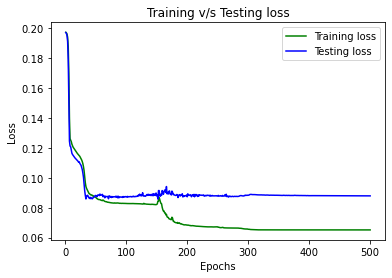

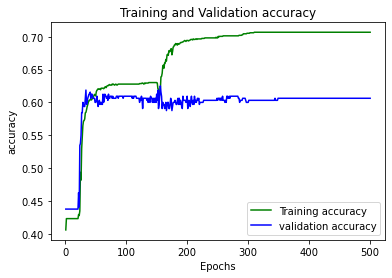

In [25]:
Model1_relu=Neural_Network_Classifier("relu")
Model1_relu.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
Model_result=Model1_relu.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=500, batch_size=200)
loss_calculation(Model_result,500)

### Pickle model to json  for c as ReLu is giving accuracy = 62% and tahn=63%

In [27]:
Model1_relu.save_weights("Model1_weights.h5")
Model_1=Model1_relu.to_json()
with open("Model_1","w") as file:
    file.write(Model_1)  

### Load json model from the disk

In [28]:
file=open("Model_1",'r')
model1=file.read()
file.close()
loaded_model=model_from_json(model1)
loaded_model.load_weights("Model1_weights.h5")

###  Evaluate the model for accuracy

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(testx_scaled,Ytest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

##  Call Neural Network Regressor and call it with different activation function , optimizer

In [ ]:
 Model1.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
 Model_result=Model1.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=epochs, batch_size=200)

Epoch 1/500
7/7 [==============================] - 2s 71ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 3/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 118/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 119/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 120/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 121/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 122/500
7/7 [==============================] - 0s 16ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 123/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 176/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 177/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 178/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 179/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 180/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 181/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 233/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 234/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 235/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 236/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 237/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 238/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 239/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 291/500
7/7 [==============================] - 0s 16ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 292/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 293/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 294/500
7/7 [==============================] - 0s 16ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 295/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 296/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 297/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 349/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 350/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 351/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 352/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 353/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 354/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 355/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 407/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 408/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 409/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 410/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 411/500
7/7 [==============================] - 0s 24ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 412/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 413/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 465/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 466/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 467/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 468/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 469/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 470/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 471/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

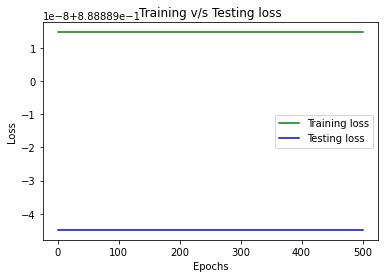

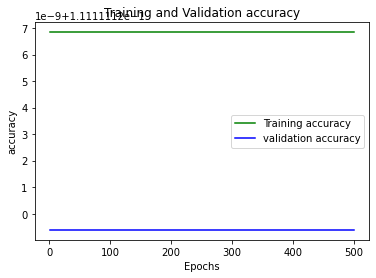

In [37]:
Model2_tanh=Neural_Network_Regressor("tanh")
Model2_tanh.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
Model_result=Model2_tanh.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=500, batch_size=200)
loss_calculation(Model_result,500)

Epoch 1/500
7/7 [==============================] - 1s 58ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 2/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 6/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 7/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 118/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 119/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 120/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 121/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 122/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 123/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 176/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 177/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 178/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 179/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 180/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 181/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 233/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 234/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 235/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 236/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 237/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 238/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 239/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 291/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 292/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 293/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 294/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 295/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 296/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 297/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 349/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 350/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 351/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 352/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 353/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 354/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 355/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 407/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 408/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 409/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 410/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 411/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 412/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 413/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

Epoch 465/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 466/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 467/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 468/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 469/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 470/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 471/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.1111 - val_loss: 0.8889 - val_accuracy: 0.1111
Epoch 

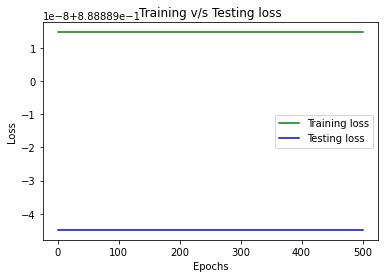

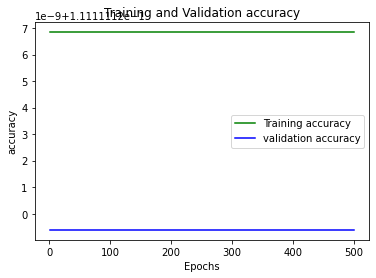

In [38]:
Model2_sigmoid=Neural_Network_Regressor("sigmoid")
Model2_sigmoid.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
Model_result=Model2_sigmoid.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=500, batch_size=200)
loss_calculation(Model_result,500)

In [ ]:
Model2_relu=Neural_Network_Regressor("relu")
Model2_relu.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
Model_result=Model2_relu.fit(trainx_scaled, Ytrain, validation_data=(testx_scaled,Ytest), epochs=500, batch_size=200)
